In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('https://raw.githubusercontent.com/nickkatsy/python_ml_ect_/master/Customer%20Data.csv')
df.isna().sum()
print(df.dtypes)



CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [2]:
df.isna().sum()
df.drop('CUST_ID',axis=1,inplace=True)
df.dropna(inplace=True)

In [3]:

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df_scaled = ms.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(df_scaled)


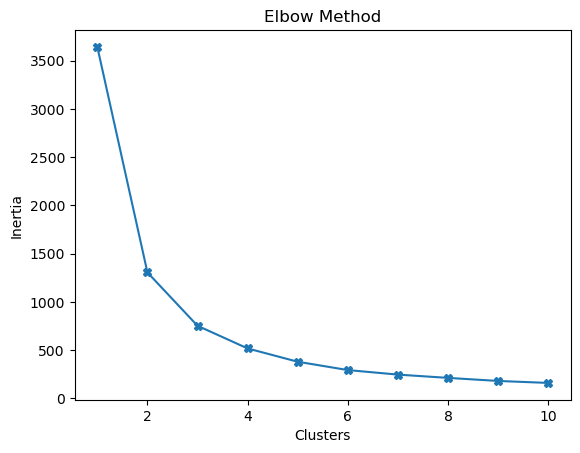

In [4]:
from sklearn.cluster import KMeans

cc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=1).fit(pca_scaled)
    cc.append(kmeans.inertia_)


plt.plot(range(1,11),cc,marker='X')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()


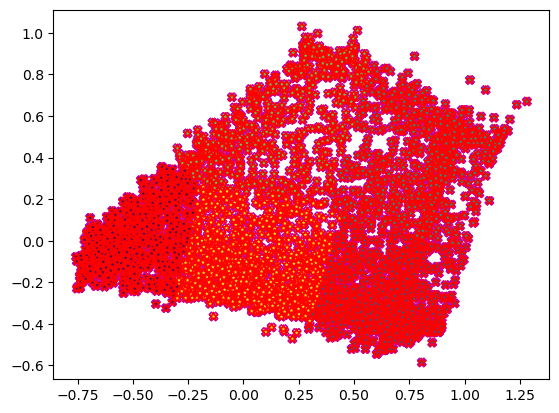

sh score:  57.41039529172865
inertia 380.32535240418554


In [6]:
# k = 5 optimal number of clusters


kmeans = KMeans(n_clusters=5,init='k-means++',n_init=20,random_state=1).fit(pca_scaled)
labels = kmeans.labels_
df['Cluster 1'] = labels
df['Cluster 2'] = labels
df['Cluster 3'] = labels

plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=df['Cluster 1'],edgecolors='r',marker='X')
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=df['Cluster 2'],edgecolors='m',marker='X')
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=df['Cluster 3'],edgecolors='r',marker='*')
plt.show()



from sklearn.metrics import silhouette_score

sh = silhouette_score(pca_scaled,labels)
print('sh score: ',sh*100)
print('inertia',kmeans.inertia_)
